## 1. read in the possible reconnection point list (from Luis)

In [24]:
import numpy as np
import athena_read as ath

def read_hist1d(fname):
    dtype = np.dtype([ ('x', 'f8'),('y','f8'),('z','f8'),('j','f8')])
    ahist = np.loadtxt(fname, dtype=dtype, skiprows=1, usecols=(1,2,3,10))
    return ahist['x'],ahist['y'],ahist['z'],ahist['j']
x,y,z,jsite = read_hist1d('data/list1_jtot_t0100.dat')

direname='/tigress/jiming/reconnect/athena/bin/x2y4z1r256pm1re8000/'
basename='Unstra.out2.'
appdname='athdf'
histname='Unstra.hst'

fname = direname+basename+str(100).zfill(5)+'.'+appdname
time,data = ath.athdf(fname,quantities=['Bcc1'])
x1f,x2f,x3f = data['x1f'],data['x2f'],data['x3f']

# convert xyz into indices
def find_index(xc,xf):
    if np.size(xc)!=1:
      print "error in the first input variable"
      return
    index = np.size(xf)-1; ixc = 0
    for i in np.arange(index+1):
      if xc < xf[i]:
        ixc = i-1
        break
    if ixc == 0:
      print "input xc out of xf range"
      return
    else:
      return ixc

rec_site={};count=0
for x1,x2,x3 in zip(x,y,z):
  ix = find_index(x1,x1f)
  iy = find_index(x2,x2f)
  iz = find_index(x3,x3f)
  rec_site[(iz,iy,ix)] = jsite[count]
  count +=1


  

time =  314.15926


## 2. load current sheets identified from my sim.

In [28]:
import cPickle as pickle
fname = 'data/Unstra.out2.00100.athdf.jlist.p'
jlist_sorted = pickle.load( open( fname, "rb" ) )
print len(jlist_sorted),' current sheets'

9722  current sheets


In [72]:
print len(jlist_sorted[0])

174800


## 3. try to match reconnection site and current sheet structures

we input the rec_site = {(location):jcurrent}, and output on_jsheet ={(location):{jsheet}} the dictionary of the current sheet on which the reconnection occur; and also output on_recsite ={jlist index:[location list]} which describes the reconnection sites on a given current sheet.

In [81]:
# search for the current sheet given a null point? 
on_jsheet = {}; on_recsite = {}
jvolume = 0.0; numrec = float(len(rec_site))
for i in range(0,len(jlist_sorted)):
  jvolume +=len(jlist_sorted[i]) # obtain total volume
  for location in rec_site.keys():
    if location in jlist_sorted[i]:
      #null.remove(location)
      on_jsheet[location] = jlist_sorted[i] # store rec site location:jsheet key:value pairs
      if i in on_recsite.keys():
        on_recsite[i].append(location)
      else:
        on_recsite[i] = [location]
print len(on_jsheet)
print 
# calc the number density of rec on current sheet or in the whole box
nx=512
ny=504
nz=256
totvolume = float(nx*ny*nz)

print "number of reconnecting sites in whole volume = ", len(rec_site)
print "number of current sheet in whole volume = ", len(jlist_sorted)
print "number of reconnecting sheet in whole volume = ", len(on_jsheet)
print "current sheet volume / whole box volume = ", jvolume/totvolume


168

number of reconnecting sites in whole volume =  168
number of current sheet in whole volume =  9722
number of reconnecting sheet in whole volume =  168
current sheet volume / whole box volume =  0.0186583049714


In [88]:
# indices of current sheet which have reconncection
print on_recsite.keys()

[0, 1, 2, 3, 4, 5, 6, 519, 8, 9, 128, 11, 13, 14, 15, 16, 205, 19, 404, 22, 23, 25, 28, 29, 30, 214, 176, 35, 37, 170, 199, 45, 46, 559, 48, 50, 52, 54, 215, 56, 58, 59, 188, 190, 64, 65, 194, 70, 71, 465, 713, 74, 75, 77, 78, 141, 81, 291, 84, 86, 87, 88, 90, 271, 92, 314, 471, 96, 97, 327, 229, 230, 103, 105, 106, 236, 347, 115, 372, 121, 379, 124, 426, 126]


In [58]:
# ## sanity check to see if the input Jcurrent matches identified on current sheet
# print "location  j_rec_site   j_sheet_identified"
# for location in on_jsheet.keys():
#     print location, rec_site[location], on_jsheet[location][location]**0.5

location  j_rec_site   j_sheet_identified
(245, 309, 145) 101.76746 101.767463775
(97, 100, 313) 141.12172 141.121713134
(92, 26, 219) 134.99454 134.994540759
(156, 120, 192) 123.91245 123.912453308
(40, 167, 444) 103.92193 103.921927705
(115, 198, 199) 198.95334 198.953324042
(150, 405, 234) 149.67026 149.670258408
(204, 169, 45) 175.0143 175.014290724
(133, 28, 190) 171.9832 171.983213584
(123, 223, 356) 121.99343 121.993432808
(171, 249, 5) 212.58646 212.586448856
(35, 353, 391) 140.77275 140.772756993
(181, 157, 294) 133.62595 133.625946571
(162, 130, 326) 210.80621 210.806213165
(7, 264, 346) 151.91907 151.919059796
(114, 429, 289) 137.33604 137.336042381
(141, 218, 281) 142.26268 142.26269206
(151, 280, 256) 179.81226 179.812253381
(138, 258, 305) 160.36995 160.369946755
(195, 196, 19) 114.93409 114.934092716
(156, 90, 356) 195.10069 195.100702793
(246, 135, 388) 123.7496 123.749595691
(87, 397, 256) 144.2977 144.297705203
(100, 140, 250) 141.54323 141.543232945
(39, 121, 483) 12

## visualize reconnecting site spatial distribution

<IPython.core.display.Javascript object>


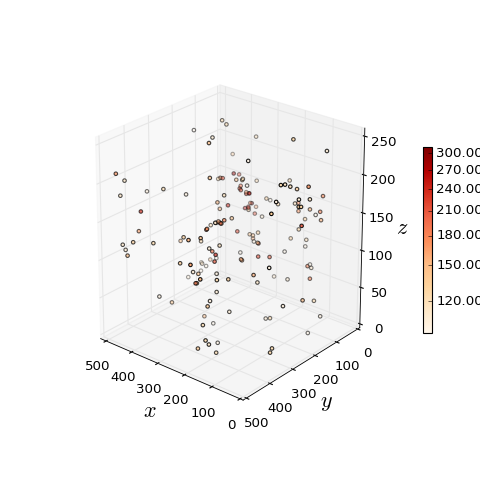

311.72229 98.61928


In [52]:
#
# try to visualize the spatial distribution of rec site
#
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
%matplotlib notebook

# create the scatter plot
matplotlib.rcParams['figure.figsize'] = (6, 6)
fig = plt.figure()
fraction=0.025;pad=0.08
ax = fig.gca(projection='3d')
cs = np.array(rec_site.values())
print max(cs),min(cs)
# create a mappable colormap based on the value of j^2 in log scale
#cNorm = matplotlib.colors.Normalize(vmin=np.min(cs), vmax=np.max(cs))
cNorm = matplotlib.colors.LogNorm(vmin=np.min(cs), vmax=np.max(cs))
scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap=plt.get_cmap('OrRd'))
#print scalarMap.to_rgba(cs)


#ax = Axes3D(fig)
loc=np.array(rec_site.keys())
ax.scatter(loc[:,2], loc[:,1], loc[:,0],marker='o',s=10,c=scalarMap.to_rgba(cs))
scalarMap.set_array(cs)
# fiddling with the color-bar
cb=fig.colorbar(scalarMap,fraction=fraction,pad=pad,orientation='vertical',format='%.2f')
tick_locator = matplotlib.ticker.MaxNLocator(nbins=8)
cb.locator = tick_locator
cb.update_ticks()

ax.set_xlim3d(0, 511)
ax.set_ylim3d(0, 503)
ax.set_zlim3d(0, 255)

ax.set_xlabel(r'$x$',size=20)
ax.set_ylabel(r'$y$',size=20)
ax.set_zlabel(r'$z$',size=20)
ax.view_init(elev=22, azim=130)

In [96]:
print np.array(on_recsite[0])[0]
print on_recsite[0][0]


[181 157 294]
(181, 157, 294)


<IPython.core.display.Javascript object>


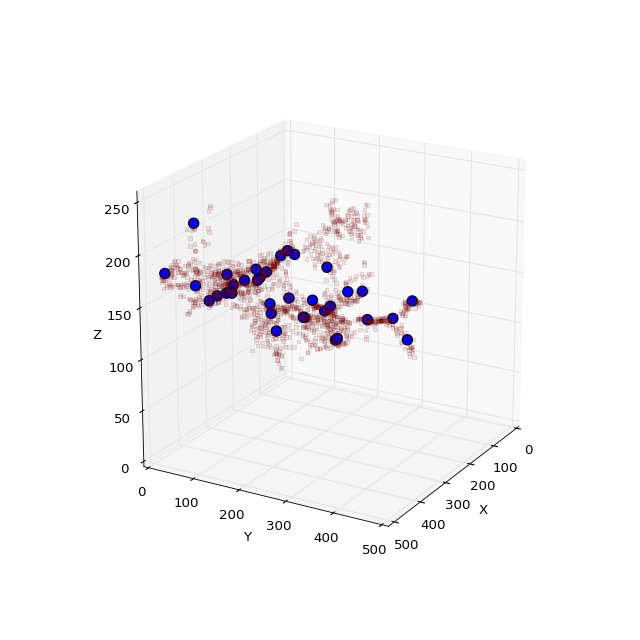

In [100]:
# plot the largest sheet which has reconnection
rec_list=np.array(on_recsite[0])
jsheet = jlist_sorted[0]
# prepare grid points with sheet found above
locs = np.array(jsheet.keys())  
nlocs = locs.shape[0]
nrec  = len(on_recsite[0])
stride = 100

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
%matplotlib notebook



# create the scatter plot
matplotlib.rcParams['figure.figsize'] = (8, 8)
fig = plt.figure()
fraction=0.025;pad=-0.1
ax = fig.gca(projection='3d')

ax.scatter(locs[0:nlocs-1:stride,2], locs[0:nlocs-1:stride,1], locs[0:nlocs-1:stride,0],\
           marker='s',s=10,c='r',alpha=0.1)

ax.scatter(rec_list[:,2],rec_list[:,1],rec_list[:,0],marker='o',s=85,c='b',alpha=1)

ax.set_xlim3d(0, 511)
ax.set_ylim3d(0, 503)
ax.set_zlim3d(0, 255)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(elev=20, azim=30)   

## test the script to measure sheet thickness with Hessian matrix

In [103]:
from hessian import hessian

js = jlist_sorted[0]
maxj = np.sqrt(np.max(np.array(js.values())))
idx_maxj = np.argmax(np.array(js.values()))
locs = np.array(js.keys())
print locs.shape

(174800, 3)


In [ ]:
nlocs = size(locs[:,0])
ncol,nstep = 3,1 # nstep=ncol/2
jbox = np.zeros([ncol,ncol,ncol])
loclist = [(locs[i,0],locs[i,1],locs[i,2]) for i in range(0,nlocs)]
knd,jnd,ind = locs[idx_maxj,0],locs[idx_maxj,1],locs[idx_maxj,2]
for i in range(0,ncol):
 for j in range(0,ncol):
   for k in range(0,ncol):
     tnd = (knd-nstep+k,jnd-nstep+j,ind-nstep+i)
     if tnd in loclist:
       jbox[k,j,i] = js[tnd]
print 'in jsheet # ',num, ' jbox= ',jbox
hess_jbox = hessian(jbox)
hess_jmax = hess_jbox[:,:,nstep,nstep,nstep]
w,v = np.linalg.eig(hess_jmax)
major = 0
for i in range(1,3):
 if np.abs(w[i])>np.abs(w[i-1]):
   major = i
hvec = v[:,major]
#print 'hvec = ',hvec
##projection along hvec and then find the thickness 
rad = np.array([np.linalg.norm(np.cross(xlocs[i,:],hvec)) for i in range(0,nlocs)])
idx_dis = [i for i in range(0,nlocs) if (np.abs(rad[i]-rad[idx_maxj]) <= 2.0*dx)]
ndis = len(idx_dis)
#d3 = np.array(sorted([xlocs[i,:].dot(i3) for i in idx_dis]))
d3 = np.array(sorted([xlocs[i,:].dot(hvec) for i in idx_dis]))
d_maxj = xlocs[idx_maxj,:].dot(hvec)
idx_maxj = (np.abs(d3-d_maxj)).argmin()
lower,upper = 0,ndis-1
for i in range(idx_maxj,1,-1):
 if np.abs(d3[i-1]-d3[i]) >dx*1.414:
   lower = i
   break
for i in range(idx_maxj,ndis-2,1):
 if np.abs(d3[i+1]-d3[i]) >dx*1.414:
   upper = i
   break

#L3 = np.max([(max(d3)-min(d3)),dx])
L3 = np.abs(d3[upper]-d3[lower])
